<center><h1>Exploratory Data Analysis - Student alcohol consumption</h1></center>

<h2>Step 0 - Loading and previewing the data</h2>

In [1]:
import pandas as pd # For data clearning and manipulation
pd.set_option('display.max_columns', 500) # Ensures all features / dataframe columns are printed


In [2]:
# Read dataset and preview it
data_frame = pd.read_csv(filepath_or_buffer="./student-mat.csv", sep=";")
data_frame.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
# Summarize data
data_frame.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The summarized data shows that the greatest variance within features can be found, in order, in the following
features:
1. G3
2. G2
3. G1
4. Absences
5. health

Surprisngly enough, there doesn't appear to be much variation in the two features that represent alcohol consumption: Dalc and Walc. Let's explore that further later on. It should also be noted that the paper that this dataset is associated with uses a combination of Dalc and Walc as the measure of alcohol consumption instead of using them both separately. Perhaps combining the two features similarly to the paper would show more variation. We'll explore that idea further later on

<h2>Step 1: Cleaning up the data</h2>

In [32]:
# Starting data pre-processing
data_frame.select_dtypes(include=['object']) # Getting all non-numerical columns
data_frame_categorical = pd.get_dummies(data=data_frame) # Categorical expansion
data_frame_categorical.head() 



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
pca = PCA(n_components=3)
x = pca.fit(data_frame_categorical).transform(data_frame_categorical)
pca.explained_variance_
pca.components_

array([[  2.86222554e-02,   1.37189542e-02,   3.27606988e-03,
         -1.01770503e-03,  -6.81776472e-03,   6.22809066e-03,
         -5.01472971e-03,  -7.17988563e-03,   6.73682857e-03,
          1.29690370e-02,   2.28422931e-02,  -5.24876159e-03,
          9.98308700e-01,  -1.53802879e-02,  -1.74715676e-02,
          1.74941105e-02,   3.46403636e-03,  -3.46403636e-03,
          4.13799579e-03,  -4.13799579e-03,   1.50150481e-03,
         -1.50150481e-03,  -2.05168495e-03,   2.05168495e-03,
          5.15892840e-03,  -5.15892840e-03,  -2.37790137e-03,
         -1.55817982e-03,   2.61063291e-03,   1.24532451e-03,
          8.01237703e-05,  -8.54166557e-04,  -1.24612051e-04,
          1.08129396e-03,   7.41120604e-04,  -8.43635955e-04,
         -9.98320238e-03,   6.22020191e-03,  -1.04370659e-04,
          3.86737113e-03,  -6.21978691e-03,   1.37373508e-03,
          4.84605183e-03,  -9.42733699e-04,   9.42733699e-04,
         -1.49309470e-03,   1.49309470e-03,  -5.04389668e-04,
        

In [7]:
x

array([[ 0.40451978,  8.32011642, -1.06397264],
       [-1.67224155,  9.03409872, -1.37833996],
       [ 4.34611528,  3.72482426, -2.97968413],
       ..., 
       [-2.59371101,  4.7142757 ,  0.48619734],
       [-5.67750253, -0.35300432, -0.77308726],
       [-0.6042663 ,  3.49218443, -1.89498905]])

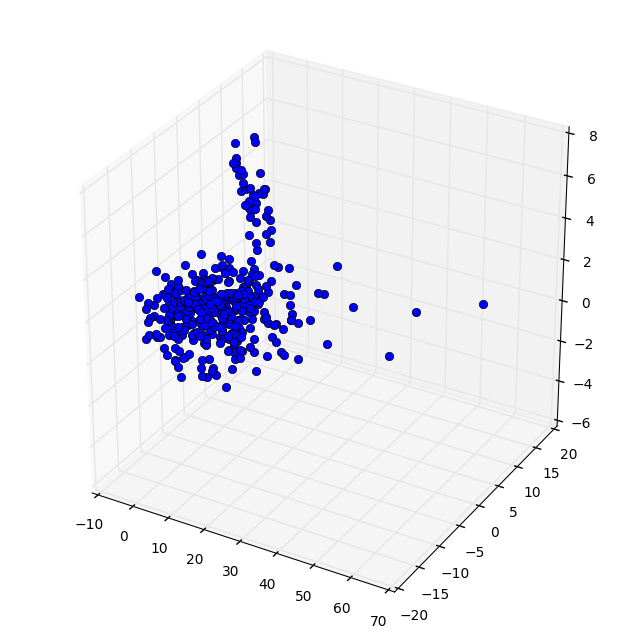

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(x[:,0], x[:,1], x[:,2], 'o')
plt.show()

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

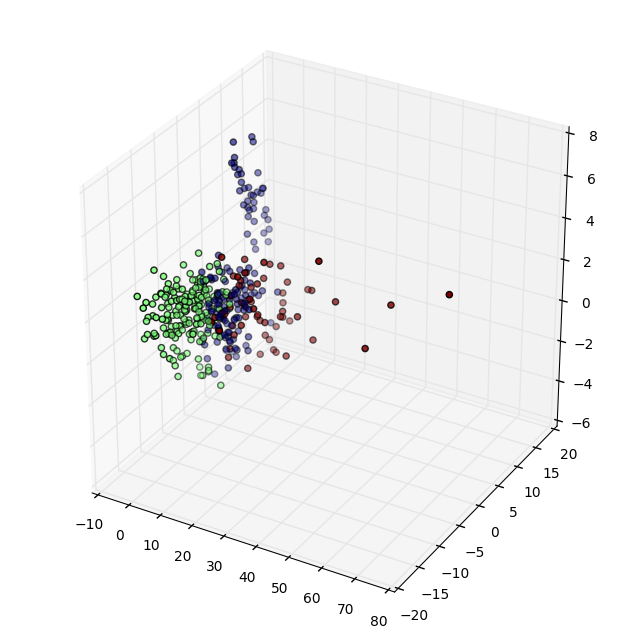

In [10]:
import numpy as np
labels = kmeans.labels_
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], 'o', c=labels.astype(np.float))
plt.show()

In [11]:
#Append K-means label to dataframe
labels_col = pd.DataFrame(data=labels, columns=['KMeans_label'])
data_frame_labeled = data_frame_categorical.join(labels_col)

# Split
clusters = data_frame_labeled.groupby('KMeans_label')
clusters = [clusters.get_group(z) for z in clusters.groups]

In [12]:
cluster0_summary = clusters[0].describe()
cluster0_summary
#cluster0_summary.loc['std']
#cluster0_summary['Walc']

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,KMeans_label
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,16.725490,2.45098,2.281046,1.549020,2.006536,0.555556,4.000000,3.222222,3.267974,1.444444,2.307190,3.575163,3.058824,8.091503,7.562092,6.614379,0.862745,0.137255,0.607843,0.392157,0.267974,0.732026,0.758170,0.241830,0.078431,0.921569,0.215686,0.052288,0.385621,0.209150,0.137255,0.052288,0.026144,0.594771,0.281046,0.045752,0.457516,0.261438,0.065359,0.215686,0.222222,0.679739,0.098039,0.803922,0.196078,0.346405,0.653595,0.588235,0.411765,0.509804,0.490196,0.202614,0.797386,0.091503,0.908497,0.215686,0.784314,0.660131,0.339869,0.0
std,1.329005,1.09389,1.047915,0.794232,0.823158,0.979318,0.835086,0.912070,1.135588,0.785467,1.294122,1.301279,3.275176,1.667647,2.774010,4.052491,0.345246,0.345246,0.489835,0.489835,0.444358,0.444358,0.429598,0.429598,0.269732,0.269732,0.412648,0.223337,0.488340,0.408038,0.345246,0.223337,0.160087,0.492549,0.450986,0.209632,0.499828,0.440861,0.247971,0.412648,0.417105,0.468109,0.298344,0.398332,0.398332,0.477387,0.477387,0.493769,0.493769,0.501546,0.501546,0.403268,0.403268,0.289270,0.289270,0.412648,0.412648,0.475220,0.475220,0.0
min,15.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,2.00000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,7.000000,7.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
50%,17.000000,2.00000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,8.000000,8.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
75%,18.000000,3.

In [13]:
cluster1_summary = clusters[1].describe()
cluster1_summary
#cluster1_summary.loc['std']
#cluster1_summary['Walc']

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,KMeans_label
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0
mean,16.480874,2.945355,2.704918,1.387978,2.147541,0.076503,3.950820,3.251366,2.912568,1.431694,2.125683,3.557377,3.366120,13.464481,13.612022,13.759563,0.879781,0.120219,0.442623,0.557377,0.207650,0.792350,0.688525,0.311475,0.109290,0.890710,0.103825,0.114754,0.338798,0.273224,0.169399,0.049180,0.054645,0.508197,0.284153,0.103825,0.338798,0.251366,0.109290,0.300546,0.251366,0.704918,0.043716,0.928962,0.071038,0.437158,0.562842,0.491803,0.508197,0.459016,0.540984,0.213115,0.786885,0.010929,0.989071,0.153005,0.846995,0.721311,0.278689,1.0
std,1.189891,1.077883,1.094606,0.617748,0.904860,0.286404,0.933378,1.001200,1.001650,0.860923,1.209189,1.454715,3.270304,2.315166,2.134815,2.331604,0.326109,0.326109,0.498060,0.498060,0.406738,0.406738,0.464367,0.464367,0.312858,0.312858,0.305870,0.319599,0.474600,0.446837,0.376133,0.216838,0.227909,0.501304,0.452247,0.305870,0.474600,0.434989,0.312858,0.459754,0.434989,0.457331,0.205023,0.257593,0.257593,0.497396,0.497396,0.501304,0.501304,0.499685,0.499685,0.410632,0.410632,0.104254,0.104254,0.360980,0.360980,0.449584,0.449584,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,15.000000,2.000000,2.000000,1.000000,1.500000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,12.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,13.000000,13.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0

In [14]:
cluster2_summary = clusters[2].describe()
cluster2_summary
#cluster2_summary.loc['std']
#cluster2_summary['Walc']

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,KMeans_label
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,17.288136,2.915254,2.576271,1.372881,1.762712,0.559322,3.779661,3.220339,3.305085,1.728814,2.762712,3.491525,19.847458,10.288136,9.898305,9.898305,0.949153,0.050847,0.576271,0.423729,0.152542,0.847458,0.661017,0.338983,0.152542,0.847458,0.118644,0.084746,0.338983,0.355932,0.101695,0.050847,0.067797,0.559322,0.271186,0.050847,0.220339,0.389831,0.101695,0.288136,0.169492,0.677966,0.152542,0.864407,0.135593,0.338983,0.661017,0.576271,0.423729,0.542373,0.457627,0.186441,0.813559,0.067797,0.932203,0.084746,0.915254,0.508475,0.491525,2.0
std,1.218406,0.987650,1.070021,0.640536,0.567480,0.771724,0.929735,1.204414,1.289938,1.171950,1.406132,1.430853,11.585981,2.965612,2.874951,2.969354,0.221572,0.221572,0.498390,0.498390,0.362632,0.362632,0.477427,0.477427,0.362632,0.362632,0.326145,0.280894,0.477427,0.482905,0.304841,0.221572,0.253555,0.500730,0.448388,0.221572,0.418033,0.491898,0.304841,0.456782,0.378406,0.471267,0.362632,0.345295,0.345295,0.477427,0.477427,0.498390,0.498390,0.502478,0.502478,0.392805,0.392805,0.253555,0.253555,0.280894,0.280894,0.504219,0.504219,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,14.000000,8.000000,8.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.0
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,3.000000,3.000000,16.000000,10.000000,10.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.0
75%,18.000000,4.000000,3.500000,2.000000,2.000000,1.000000,4.

In [15]:
#http://chrisalbon.com/python/pandas_indexing_selecting.html


In [16]:
import matplotlib as mpl

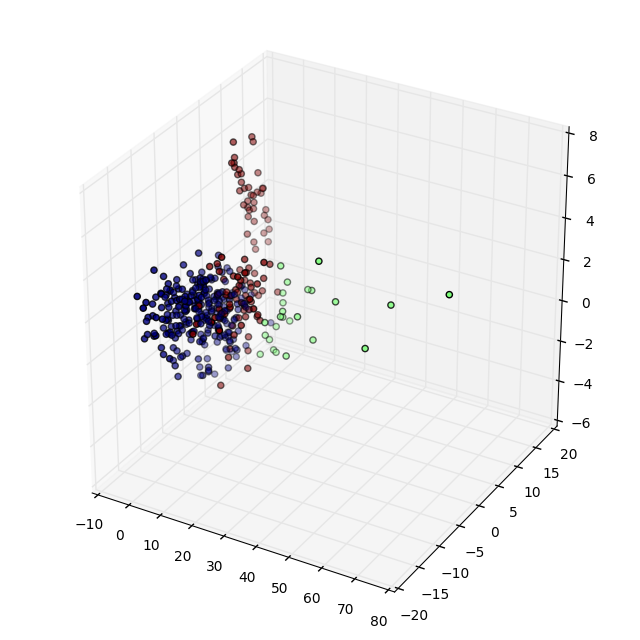

In [17]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 3).fit(x)
labels = gmm.predict(x)
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], 'o', c=labels.astype(np.float))
plt.show()

In [18]:
labels_col = pd.DataFrame(data=labels, columns=['GMM_label'])
data_frame_labeled = data_frame_categorical.join(labels_col)
clusters = data_frame_labeled.groupby('GMM_label')
clusters = [clusters.get_group(z) for z in clusters.groups]


In [19]:
cluster0_summary = clusters[0].describe()
cluster0_summary.loc['std']
#cluster0_summary['Walc']

age                  1.203667
Medu                 1.128792
Fedu                 1.086431
traveltime           0.700912
studytime            0.860279
failures             0.612589
famrel               0.867118
freetime             0.971811
goout                1.056676
Dalc                 0.825605
Walc                 1.263731
health               1.394205
absences             2.588732
G1                   3.239495
G2                   3.041795
G3                   3.107554
school_GP            0.331889
school_MS            0.331889
sex_F                0.500863
sex_M                0.500863
address_R            0.417939
address_U            0.417939
famsize_GT3          0.455904
famsize_LE3          0.455904
Pstatus_A            0.277390
Pstatus_T            0.277390
Mjob_at_home         0.352253
Mjob_health          0.293853
Mjob_other           0.479002
Mjob_services        0.436553
Mjob_teacher         0.359794
Fjob_at_home         0.191616
Fjob_health          0.217177
Fjob_other

In [20]:
cluster1_summary = clusters[1].describe()
cluster1_summary.loc['std']
#cluster1_summary['Walc']

age                   1.392839
Medu                  1.051982
Fedu                  0.962635
traveltime            0.583095
studytime             0.637704
failures              0.925563
famrel                0.927362
freetime              1.267544
goout                 1.157584
Dalc                  1.288410
Walc                  1.392839
health                1.496663
absences             15.824875
G1                    1.956187
G2                    1.882374
G3                    1.997498
school_GP             0.276887
school_MS             0.276887
sex_F                 0.506623
sex_M                 0.506623
address_R             0.435890
address_U             0.435890
famsize_GT3           0.458258
famsize_LE3           0.458258
Pstatus_A             0.374166
Pstatus_T             0.374166
Mjob_at_home          0.276887
Mjob_health           0.000000
Mjob_other            0.506623
Mjob_services         0.476095
Mjob_teacher          0.374166
Fjob_at_home          0.000000
Fjob_hea

In [21]:
cluster2_summary = clusters[2].describe()
cluster2_summary.loc['std']
#cluster2_summary['Walc']

age                  1.290949
Medu                 1.025508
Fedu                 1.127008
traveltime           0.718302
studytime            0.810681
failures             0.892078
famrel               0.952958
freetime             1.004135
goout                1.216909
Dalc                 0.893165
Walc                 1.242363
health               1.360578
absences             6.892683
G1                   3.060116
G2                   4.252148
G3                   5.613468
school_GP            0.305132
school_MS            0.305132
sex_F                0.483551
sex_M                0.483551
address_R            0.412723
address_U            0.412723
famsize_GT3          0.451296
famsize_LE3          0.451296
Pstatus_A            0.348815
Pstatus_T            0.348815
Mjob_at_home         0.383949
Mjob_health          0.278862
Mjob_other           0.477865
Mjob_services        0.441619
Mjob_teacher         0.338813
Fjob_at_home         0.292443
Fjob_health          0.165856
Fjob_other

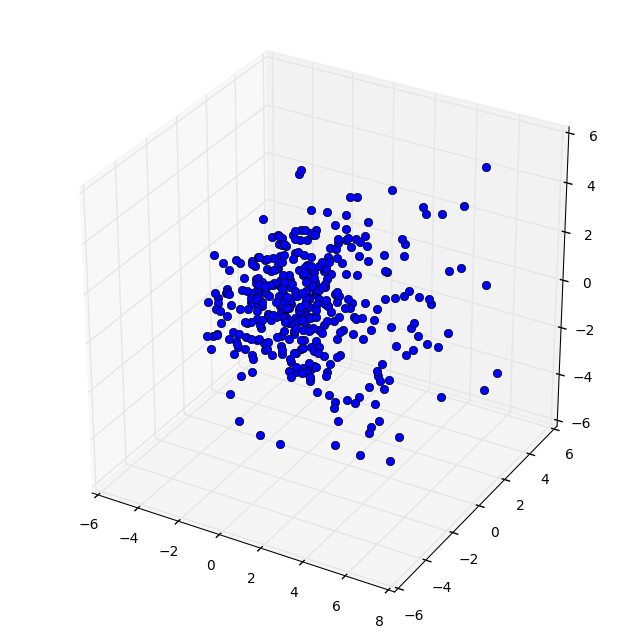

In [22]:
from scipy.stats import zscore
normalized_categorical = zscore(data_frame_categorical)

new_x = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,0], new_x[:,1], new_x[:,2], 'o')
plt.show()

In [23]:
pca.explained_variance_
#pca.components_

array([ 5.05712902,  3.54332991,  3.01096375])

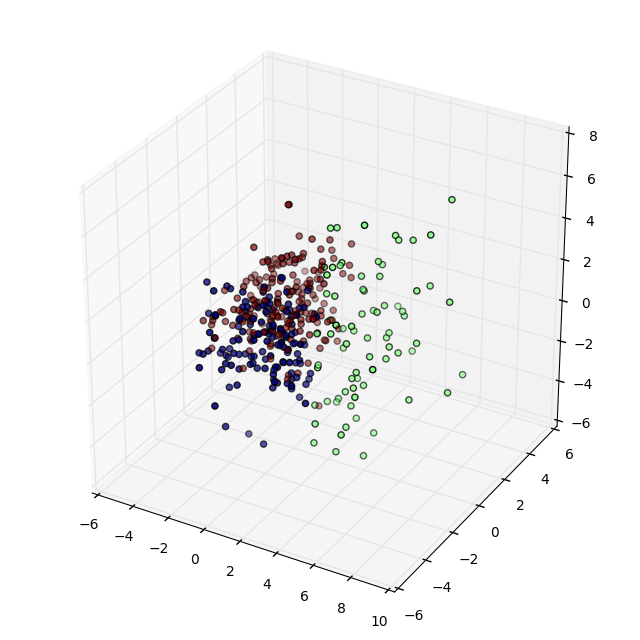

In [24]:
kmeans.fit(new_x)
labels = kmeans.labels_
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new_x[:,0], new_x[:,1], new_x[:,2], 'o', c=labels.astype(np.float))
plt.show()

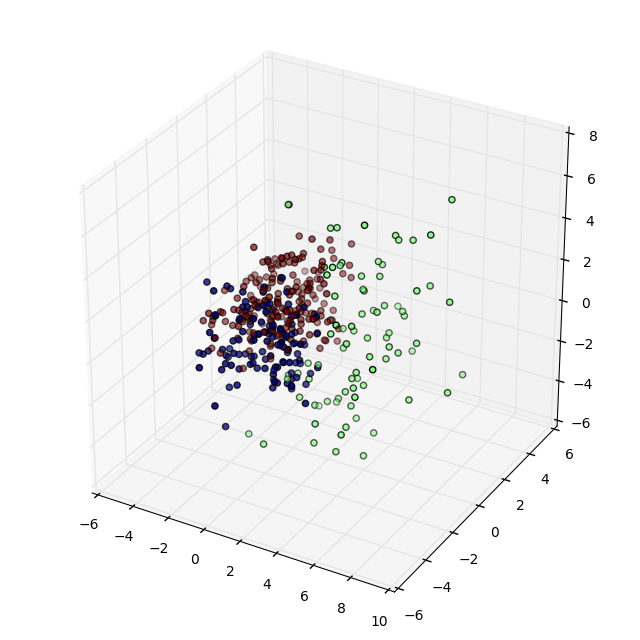

In [25]:
gmm = mixture.GaussianMixture(n_components = 3).fit(new_x)
labels = gmm.predict(new_x)
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new_x[:,0], new_x[:,1], new_x[:,2], 'o', c=labels.astype(np.float))
plt.show()

In [26]:
labels_col = pd.DataFrame(data=labels, columns=['GMM_label2'])
data_frame_labeled = data_frame_categorical.join(labels_col)
clusters = data_frame_labeled.groupby('GMM_label2')
clusters = [clusters.get_group(z) for z in clusters.groups]

In [27]:
cluster0_summary = clusters[0].describe()
cluster0_summary

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,GMM_label2
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.00000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.0,121.000000,121.000000,121.000000,121.000000,121.0
mean,16.512397,2.471074,2.355372,1.388430,2.231405,0.404959,3.942149,2.975207,2.975207,1.190083,1.818182,3.429752,6.024793,8.876033,8.537190,7.752066,0.933884,0.066116,0.92562,0.07438,0.214876,0.785124,0.842975,0.157025,0.107438,0.892562,0.256198,0.049587,0.438017,0.214876,0.041322,0.049587,0.057851,0.61157,0.223140,0.057851,0.371901,0.280992,0.049587,0.297521,0.206612,0.677686,0.115702,0.669421,0.330579,0.206612,0.793388,0.454545,0.545455,0.570248,0.429752,0.231405,0.768595,0.0,1.0,0.190083,0.809917,0.595041,0.404959,0.0
std,1.245764,0.958074,1.039708,0.624125,0.793309,0.791397,0.839618,0.879989,1.075971,0.434244,1.008299,1.346764,8.333129,2.286082,2.969403,4.121652,0.249517,0.249517,0.26348,0.26348,0.412444,0.412444,0.365337,0.365337,0.310957,0.310957,0.438348,0.217992,0.498206,0.412444,0.199862,0.217992,0.234433,0.48942,0.418083,0.234433,0.485322,0.451352,0.217992,0.459068,0.406558,0.469306,0.321198,0.472377,0.472377,0.406558,0.406558,0.500000,0.500000,0.497099,0.497099,0.423484,0.423484,0.0,0.0,0.393998,0.393998,0.492925,0.492925,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,15.000000,2.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,7.000000,7.000000,6.000000,1.000000,0.000000,1.00000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,3.000000,4.000000,8.000000,9.000000,9.000000,1.000000,0.000000,1.00000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,1.000000,0.000000,0.0
75%,17.000000,3.000000,3.000000,2.000000,3.000000,0.000000,4.000000,3.000000,4.000000,1.00

In [28]:
cluster1_summary = clusters[1].describe()
cluster1_summary

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,GMM_label2
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0,82.000000,82.000000,82.000000,82.000000,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0
mean,17.585366,1.951220,1.878049,1.865854,1.743902,0.792683,3.829268,3.402439,3.256098,1.865854,2.853659,3.731707,5.109756,10.036585,9.182927,8.597561,0.621951,0.378049,0.353659,0.646341,0.512195,0.487805,0.658537,0.341463,0.073171,0.926829,0.280488,0.0,0.451220,0.243902,0.024390,0.073171,0.0,0.560976,0.341463,0.024390,0.536585,0.219512,0.134146,0.109756,0.207317,0.658537,0.134146,0.963415,0.036585,0.682927,0.317073,0.841463,0.158537,0.621951,0.378049,0.353659,0.646341,0.243902,0.756098,0.414634,0.585366,0.682927,0.317073,1.0
std,1.246736,1.017167,0.934790,0.899413,0.843435,1.074253,0.978849,1.174416,1.293965,1.173390,1.423974,1.296232,9.397933,3.686630,4.109994,5.096258,0.487884,0.487884,0.481047,0.481047,0.502927,0.502927,0.477119,0.477119,0.262019,0.262019,0.452002,0.0,0.500677,0.432077,0.155207,0.262019,0.0,0.499322,0.477119,0.155207,0.501728,0.416463,0.342907,0.314509,0.407879,0.477119,0.342907,0.188897,0.188897,0.468200,0.468200,0.367491,0.367491,0.487884,0.487884,0.481047,0.481047,0.432077,0.432077,0.495691,0.495691,0.468200,0.468200,0.0
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,2.000000,3.000000,0.000000,7.000000,7.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,18.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,4.000000,3.000000,1.000000,3.000000,4.000000,2.000000,10.000000,9.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0
75%,18.000000,3.000000,2.000000,2.000000,2.000000,1.000000,5.000000,4.000000,4.000000,2.000000,4.000000,5.000000,6.750000,13.0000

In [29]:
cluster2_summary = clusters[2].describe()
cluster2_summary

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,GMM_label2
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,192.0,192.000000,192.000000,192.000000,192.000000,192.0
mean,16.432292,3.265625,2.901042,1.307292,2.036458,0.093750,3.994792,3.328125,3.130208,1.500000,2.348958,3.557292,5.765625,12.562500,12.739583,12.869792,0.963542,0.036458,0.348958,0.651042,0.104167,0.895833,0.651042,0.348958,0.114583,0.885417,0.026042,0.145833,0.265625,0.296875,0.265625,0.041667,0.057292,0.505208,0.291667,0.104167,0.291667,0.296875,0.098958,0.312500,0.250000,0.713542,0.036458,0.958333,0.041667,0.375000,0.625000,0.468750,0.531250,0.385417,0.614583,0.125000,0.875000,0.0,1.0,0.046875,0.953125,0.703125,0.296875,2.0
std,1.137462,0.930724,1.026150,0.564526,0.833666,0.326111,0.894997,0.960825,1.047922,0.903744,1.281401,1.453232,7.128753,2.825881,2.889754,3.105261,0.187918,0.187918,0.477887,0.477887,0.306275,0.306275,0.477887,0.477887,0.319351,0.319351,0.159676,0.353862,0.442820,0.458075,0.442820,0.200349,0.233007,0.501280,0.455718,0.306275,0.455718,0.458075,0.299387,0.464724,0.434145,0.453288,0.187918,0.200349,0.200349,0.485389,0.485389,0.500327,0.500327,0.487966,0.487966,0.331584,0.331584,0.0,0.0,0.211924,0.211924,0.458075,0.458075,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,2.0
25%,16.000000,3.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,10.000000,11.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,2.0
50%,16.000000,4.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,13.000000,13.000000,13.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,1.000000,0.000000,2.0
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.00